## Station Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from deepar_model_utils import prep_station_data
from deepar_model_utils import get_station_data
from deepar_model_utils import cluster_stations
from deepar_model_utils import deepar_station_data
from deepar_model_utils import write_dicts_to_file

%matplotlib inline

### Trip Start Station

In [2]:
start_file = "../model_trips_start_station_20208029_20220831.csv"

#s3_start_location = f"s3://{bucket}/{start_file}*"
#trips_start = pd.read_csv(s3_start_location, parse_dates = True)

trips_start = pd.read_csv(start_file, parse_dates = True)
trips_start.shape

(6059710, 2)

In [3]:
trips_start_station = pd.DataFrame(trips_start["start station id"])

In [4]:
trips_start_station = trips_start_station.groupby(["start station id"], as_index = False).size().sort_values(by = "size", ascending = False)
trips_start_station

Determine number of stations to individually cluster based on overall trip volume. Each station that is selected will be its own cluster and all other stations will be clustered together.

In [6]:
trips_start.shape[0] * 0.2

1211942.0

In [7]:
sum(trips_start_station.iloc[0:20]["size"])

1284348

In [8]:
sum(trips_start_station.iloc[0:20]["size"]) / trips_start.shape[0]

0.2119487566236668

Text(0, 0.5, 'trip count')

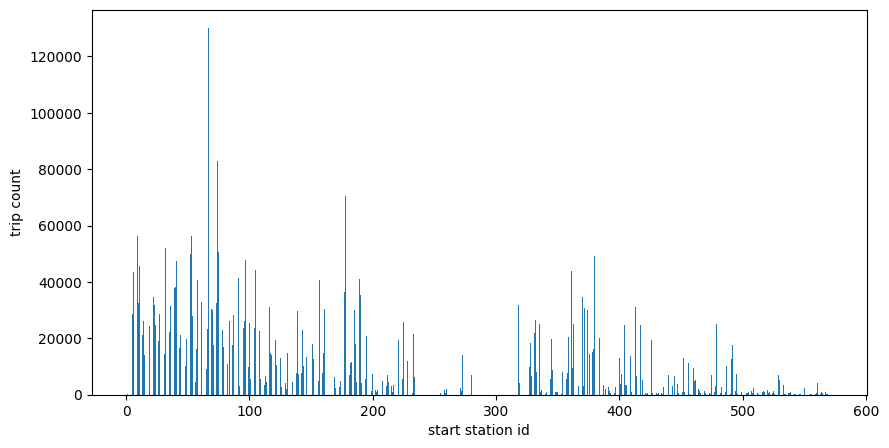

In [9]:
fig = plt.figure(figsize = (10, 5))

plt.bar(trips_start_station["start station id"], trips_start_station["size"], width = 0.5)
plt.xlabel("start station id")
plt.ylabel("trip count")

In [12]:
start_station_cluster = cluster_stations(trips_start_station, 20, "start station id")

Incorporate categories/clusters into DeepAR data format.

### Trip End Station

In [14]:
stop_file = "../model_trips_stop_station_20208029_20220831.csv"

#s3_end_location = f"s3://{bucket}/{end_file}*"
#trips_end = pd.read_csv(s3_end_location, parse_dates = True)

trips_stop = pd.read_csv(stop_file, parse_dates = True)
trips_stop.shape

(6059354, 2)

In [16]:
trips_end_station = pd.DataFrame(trips_stop["end station id"])

In [18]:
trips_end_station = trips_end_station.groupby(["end station id"], as_index = False).size().sort_values(by = "size", ascending = False)
trips_end_station

,end station id,size
59,67,129410
60,68,108422
66,74,85584
53,60,82149
97,107,75329
...,...,...
217,308,7
449,570,6
451,572,5
450,571,3


Determine number of stations to individually cluster based on overall trip volume. Each station that is selected will be its own cluster and all other stations will be clustered together.

In [20]:
trips_stop.shape[0] * 0.2

1211870.8

In [21]:
sum(trips_end_station.iloc[0:20]["size"])

1294178

In [22]:
sum(trips_end_station.iloc[0:20]["size"]) / trips_stop.shape[0]

0.2135834942140697

Text(0, 0.5, 'trip count')

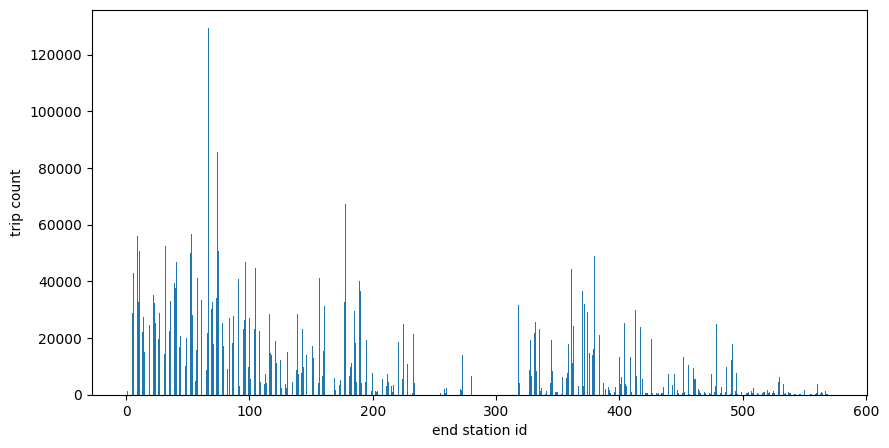

In [23]:
fig = plt.figure(figsize = (10, 5))

plt.bar(trips_end_station["end station id"], trips_end_station["size"], width = 0.5)
plt.xlabel("end station id")
plt.ylabel("trip count")

In [24]:
end_station_cluster = cluster_stations(trips_end_station, 20, "end station id")

Incorporate categories/clusters into DeepAR data format.